In [2]:
#This program predicts stock prices by using machine elarning models 
#Install the required libraries
import quandl
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


In [ ]:
#Automatic pipeline to download  multiple stock data using yfinance

import yfinance as yf
import os

# Function to download and save stock data
def download_stock_data(ticker, start_date, end_date, save_path="data", auto_adjust=False):
    # Ensure save directory exists
    os.makedirs(save_path, exist_ok=True)
    
    # Download data
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=auto_adjust)
    
    # Save to CSV
    file_path = os.path.join(save_path, f"{ticker}_data.csv")
    data.to_csv(file_path)
    
    # Print head and tail
    print(f"\n📈 {ticker} stock data:")
    print(data.head(), "\n...\n")
    print(data.tail())
    
    return data

# ✅ Ticker list with custom dates
stocks_to_download = {
    "AAPL": ("2020-01-01", "2024-01-01"),
    "GOOGL": ("2010-01-01", "2023-10-01"),
    "MSFT": ("2015-01-01", "2023-01-01")
}

# ✅ Automated download loop
for ticker, (start_date, end_date) in stocks_to_download.items():
    download_stock_data(ticker, start_date, end_date)


[*********************100%***********************]  1 of 1 completed



📈 AAPL stock data:
Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.620834  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  71.914818  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.487854  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.146927  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.307526  75.797501  76.110001  74.290001  74.290001  132079200 
...

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-12-22  192.192535  193.600006  195.410004  192.970001  195.179993   
2023-12-26  191.646545  193.050003  193.889999  192.830002  19

[*********************100%***********************]  1 of 1 completed



📈 GOOGL stock data:
Price       Adj Close      Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                                        
2010-01-04  15.590931  15.684434  15.753504  15.621622  15.689439   78169752
2010-01-05  15.522272  15.615365  15.711712  15.554054  15.695195  120067812
2010-01-06  15.130977  15.221722  15.662162  15.174174  15.662162  158988852
2010-01-07  14.778733  14.867367  15.265265  14.831081  15.250250  256315428
2010-01-08  14.975752  15.065566  15.096346  14.742492  14.814815  188783028 
...

Price        Adj Close       Close        High         Low        Open  \
Ticker           GOOGL       GOOGL       GOOGL       GOOGL       GOOGL   
Date                                                                     
2023-09-25  130.328369  131.110001  131.169998  128.960007  129.830002   
2023-09-26  127.803528  128.570007  130.360001  127.220001  1

[*********************100%***********************]  1 of 1 completed


📈 MSFT stock data:
Price       Adj Close      Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                                       
2015-01-02  39.998692  46.759998  47.419998  46.540001  46.660000  27913900
2015-01-05  39.630890  46.330002  46.730000  46.250000  46.369999  39673900
2015-01-06  39.049213  45.650002  46.750000  45.540001  46.380001  36447900
2015-01-07  39.545341  46.230000  46.459999  45.490002  45.980000  29114100
2015-01-08  40.708683  47.590000  47.750000  46.720001  46.750000  29645200 
...

Price        Adj Close       Close        High         Low        Open  \
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                     
2022-12-23  233.975876  238.729996  238.869995  233.940002  236.110001   
2022-12-27  232.241135  236.960007  238.929993  235.830002  238.699997

In [ ]:
#quandl.ApiConfig.api_key = "y#################"
# Fetching Google stock data from Quandl
#df= quandl.get("WIKI/GOOGL")
#print(df.head())


# Example usage
df = download_stock_data('AAPL', '2020-01-01', '2024-01-01')
df = yf.download("GOOGL", start="2010-01-01", end="2023-10-01", auto_adjust=False)
print(df.head())
print(df.tail())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                                        
2010-01-04  15.590929  15.684434  15.753504  15.621622  15.689439   78169752
2010-01-05  15.522272  15.615365  15.711712  15.554054  15.695195  120067812
2010-01-06  15.130977  15.221722  15.662162  15.174174  15.662162  158988852
2010-01-07  14.778733  14.867367  15.265265  14.831081  15.250250  256315428
2010-01-08  14.975751  15.065566  15.096346  14.742492  14.814815  188783028
Price        Adj Close       Close        High         Low        Open  \
Ticker           GOOGL       GOOGL       GOOGL       GOOGL       GOOGL   
Date                                                                     
2023-09-25  130.328369  131.110001  131.169998  128.960007  129.830002   
2023-09-26  127.803528  128.570007  130.360001  127.220001  129.770004   
2023-09-27  12

In [58]:
#get ajusted close price
df = df[['Adj Close']]
print(df.head())

Price       Adj Close
Ticker          GOOGL
Date                 
2010-01-04  15.590929
2010-01-05  15.522272
2010-01-06  15.130977
2010-01-07  14.778733
2010-01-08  14.975751


In [59]:
# A variable for predicting 'forecast_out' days out into the future
forecast_out= 30
#create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#Print new dataset
print(df.head())


Price       Adj Close Prediction
Ticker          GOOGL           
Date                            
2010-01-04  15.590929  13.388424
2010-01-05  15.522272  13.513053
2010-01-06  15.130977  13.451858
2010-01-07  14.778733  13.502604
2010-01-08  14.975751  13.310312


Seperating labels, dependent and independent columns

In [60]:
#create the independent dtata set (X)
#convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],axis= 1))
#remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[ 15.59092903]
 [ 15.52227211]
 [ 15.13097668]
 ...
 [129.00630188]
 [127.93274689]
 [129.14546204]]


In [37]:
#create the dependednt data set (y)
#convert the dataframe to a numpy array
y = np.array(df['Prediction'])
#Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)


[ 15.52227211  15.13097668  14.77873325 ... 129.76177979 131.52124023
 130.07987976]


In [ ]:
#split the data into 80% training and 20% testing
# The variables X_train, X_test, y_train, y_test are already defined in the notebook.
# You do not need to redefine them with train_test_split again.
# Simply remove this line to avoid the error.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2766, 1) (692, 1) (2766,) (692,)


In [70]:
#Create and train the models
model=SVR(kernel='rbf',C=1e3, gamma=0.1)
model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,1000.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [69]:
#Testing the model: Score returns the coefficient of determination R^2 of the prediction.
#best possible score is 1.0
confidence = model.score(X_test, y_test)
print("Model_svm confidence:", confidence)

Model_svm confidence: 0.9989556311106423


In [68]:
#create the linear regression model
lr = LinearRegression()
#Train the model
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
#Test the model
confidence = model.score(X_test, y_test)    
print("Model_lr confidence:", confidence)

Model_lr confidence: 0.9989556311106423


In [72]:
#Set x_forecast equal to te last 30 rows of the original data set from Adj.Close column
x_forecast = np.array(df.drop(['Prediction'], axis=1))[-forecast_out:]
print(x_forecast.shape)

(30, 1)


In [ ]:
#print the prediction for the next 'n' days
#predction with SVM model
forecast_set = model.predict(x_forecast)
print(forecast_set)

[127.70462451 128.39601509 128.78946473 129.64559907 129.00611297
 129.01877591 128.91627111 133.94062983 135.23254233 135.45698078
 135.06097747 135.14733009 133.77964734 134.72357546 135.62410578
 136.09855024 134.79530927 135.90410236 137.58720968 136.61197883
 137.7649546  137.49270425 132.44743929 129.00490539 129.02413261
 128.90670243 128.5206251  128.99055435 129.56104994 128.93735107]


In [74]:
#prediction with Linear Regression model
forecast_set_lr = lr.predict(x_forecast)
print(forecast_set_lr)

[126.69369723 127.59793351 128.30345196 131.57261037 128.99901012
 129.09838428 130.22121322 133.75870477 135.06040721 135.34858466
 134.84179929 134.95110325 133.64940081 134.44433313 135.55724753
 136.09380702 134.52381721 135.88514415 137.26634592 136.57078777
 137.37566513 137.20672142 132.93395257 129.65483386 129.46603057
 130.32058739 127.79668184 129.75420803 131.51301638 130.07219011]


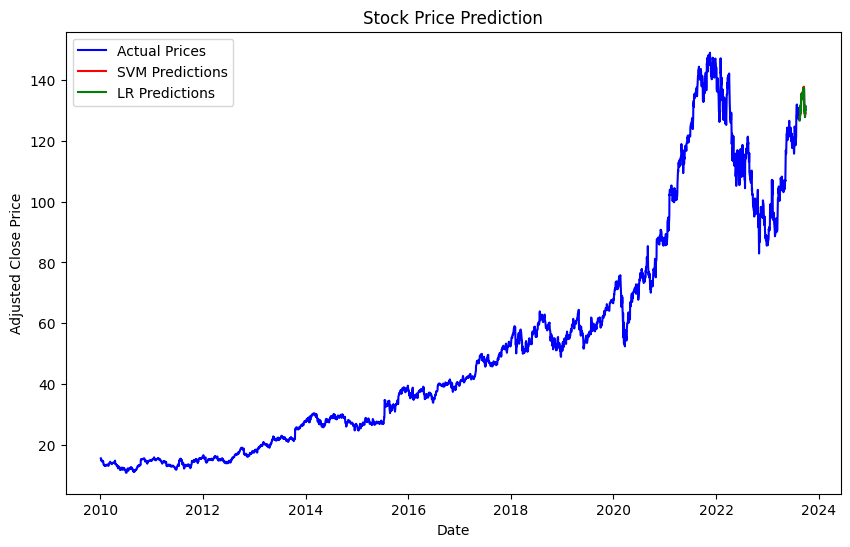

In [75]:
#Evaluate the model
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Actual Prices', color='blue')
plt.plot(df.index[-forecast_out:], forecast_set, label='SVM Predictions', color='red')
plt.plot(df.index[-forecast_out:], forecast_set_lr, label='LR Predictions', color='green')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

